# Crime data from

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2011'

In [4]:
# data folder path
data_directory = os.path.join('..','data','crime_data/{}'.format(year))
data_directory_saves = os.path.join( '..','data','clean_data/')
premise_dataset = os.path.join('..','data','crime_data/premise_codes.csv')

# combine all fines into one

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
Date             127659 non-null datetime64[ns]
Hour             127659 non-null int64
Offense Type     127659 non-null object
Beat             127659 non-null object
Premise          127659 non-null object
Block Range      127659 non-null object
Street Name      127659 non-null object
Type             127659 non-null object
Suffix           127659 non-null object
# Of Offenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [7]:
df.head(2)

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

Date             0
Hour             0
Offense Type     0
Beat             0
Premise          0
Block Range      0
Street Name      0
Type             0
Suffix           0
# Of Offenses    0
dtype: int64

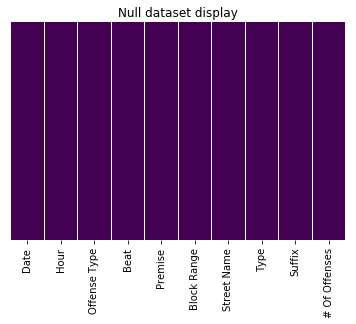

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()


## Cleanup
- lowercase column names
- joining similar columns
- renaming

In [10]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,date,hour,offense type,beat,premise,block range,street name,type,suffix,# of offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [12]:
df.rename(columns={
    '# of offenses': 'num_offenses',
     'offense type': 'offense_type',
    'block range': 'block_range',
    'street name': 'street_name'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
date            127659 non-null datetime64[ns]
hour            127659 non-null int64
offense_type    127659 non-null object
beat            127659 non-null object
premise         127659 non-null object
block_range     127659 non-null object
street_name     127659 non-null object
type            127659 non-null object
suffix          127659 non-null object
num_offenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [13]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,type,suffix,num_offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


## Drop columns

In [14]:
df.drop(['suffix','type'],axis=1, inplace=True)

In [15]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,1


## Premise

In [16]:
premise_data = pd.read_csv(premise_dataset)
#premise_data.columns = map(str.lower, premise_data.columns)
premise_data.columns = ['premise','premise_description']
premise_data.head()

,premise,premise_description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [17]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,1


In [18]:
df = pd.merge(df, premise_data, on='premise', how='outer')

In [22]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses,premise_description
0,2011-04-13,1.0,Murder,17E40,20A,6400-6499,BANKSIDE,1.0,APARTMENT
1,2011-04-06,14.0,Murder,20G30,20A,2900-2999,HAYES,1.0,APARTMENT
2,2011-04-17,23.0,Murder,11H20,20A,2500-2599,BROADWAY,1.0,APARTMENT
3,2011-04-21,15.0,Rape,17E10,20A,5900-5999,BELLAIRE,1.0,APARTMENT
4,2011-04-10,20.0,Rape,17E40,20A,12500-12599,DUNLAP,1.0,APARTMENT


## Drop premise column

In [23]:
df.drop(['premise'],axis=1, inplace=True)

## Rename premise_description to premise

In [24]:
df.rename(columns={
    'premise_description': 'premise',
}, inplace=True)

In [25]:
df.head()

,date,hour,offense_type,beat,block_range,street_name,num_offenses,premise
0,2011-04-13,1.0,Murder,17E40,6400-6499,BANKSIDE,1.0,APARTMENT
1,2011-04-06,14.0,Murder,20G30,2900-2999,HAYES,1.0,APARTMENT
2,2011-04-17,23.0,Murder,11H20,2500-2599,BROADWAY,1.0,APARTMENT
3,2011-04-21,15.0,Rape,17E10,5900-5999,BELLAIRE,1.0,APARTMENT
4,2011-04-10,20.0,Rape,17E40,12500-12599,DUNLAP,1.0,APARTMENT


# Null values

In [26]:
df.apply(lambda x: sum(x.isnull()))

date             3
hour             3
offense_type     3
beat             3
block_range      3
street_name      3
num_offenses     3
premise         88
dtype: int64

In [27]:
df[df.isnull().any(axis=1)] [:10] # display last 10

,date,hour,offense_type,beat,block_range,street_name,num_offenses,premise
126699,2011-04-20,18.0,Auto Theft,19G10,10800-10899,BEECHNUT,1.0,NaN
126700,2011-04-15,11.0,Theft,20G30,10400-10499,RICHMOND,1.0,NaN
126701,2011-05-07,15.0,Rape,1A10,1200-1299,TRAVIS,1.0,NaN
126702,2011-05-01,0.0,Theft,20G10,9900-9999,RICHMOND,1.0,NaN
126703,2011-08-15,19.0,Theft,19G10,6800-6899,WEST SAM HOUSTON,1.0,NaN
126704,2011-12-04,20.0,Burglary,11H10,6800-6899,CANAL,1.0,NaN
126705,2011-12-25,1.0,Burglary,13D10,5000-5099,TELEPHONE,1.0,NaN
126706,2011-11-27,17.0,Theft,5F30,6300-6399,ROTHWAY,1.0,NaN
126707,2011-12-05,19.0,Theft,10H80,2500-2599,DUNSTAN,1.0,NaN
126708,2011-12-04,14.0,Theft,3B10,11600-11699,NORTHWEST,1.0,NaN


### Drop rows with more than 3 null values

In [28]:
df.dropna(thresh=3,inplace=True)

In [29]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,offense_type,beat,block_range,street_name,num_offenses,premise
126777,2011-09-21,12.0,Theft,3B10,5200-5299,34TH,1.0,NaN
126778,2011-09-25,22.0,Theft,14D20,5400-5499,PEACOCK,1.0,NaN
126779,2011-09-03,0.0,Theft,20G30,12500-12599,RICHMOND,1.0,NaN
126780,2011-09-28,0.0,Theft,20G40,2300-2399,DAIRY ASHFORD,1.0,NaN
126781,2011-09-17,12.0,Theft,8C30,5900-5999,HAIGHT,1.0,NaN
126782,2011-09-22,0.0,Theft,15E40,2800-2899,BARTELL,1.0,NaN
127620,2011-12-03,0.0,Auto Theft,6B40,900-999,RINGOLD,1.0,NaN
127656,2011-10-14,0.0,Theft,4F20,11300-11399,CLAY,1.0,NaN
127657,2011-09-19,0.0,Auto Theft,18F50,6500-6599,FONDREN,1.0,NaN
127658,2011-10-28,0.0,Theft,5F30,7500-7599,LANGTRY,1.0,NaN


### Replace null values on premise_code to 'none'

In [30]:
df.premise.fillna('UNK',inplace=True)

In [31]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
offense_type    0
beat            0
block_range     0
street_name     0
num_offenses    0
premise         0
dtype: int64

# Inspect each column

## `num_offenses`

In [32]:
df.num_offenses.value_counts(dropna=False)

1.0     126367
2.0       1055
3.0        215
4.0         14
5.0          5
6.0          2
13.0         1
Name: num_offenses, dtype: int64

In [33]:
df.num_offenses.dtype

dtype('float64')

### Change the type from float to integer

In [34]:
df.num_offenses = df.num_offenses.astype('int')

In [35]:
df.num_offenses.dtype

dtype('int64')

In [36]:
df.num_offenses.value_counts(dropna=False)

1     126367
2       1055
3        215
4         14
5          5
6          2
13         1
Name: num_offenses, dtype: int64

## `beat`

In [37]:
len(df.beat.value_counts(dropna='False'))

121

In [38]:
df.beat.unique()

array(['17E40', '20G30', '11H20', '17E10', '2A60', '18F60', '18F20',
       '7C20', '5F10', '18F50', '9C40', '6B50', '17E30', '19G10', '20G70',
       '5F40', '11H50', '14D40', '19G50', '6B20', '17E20', '14D20',
       '1A20', '1A50', '5F30', '19G20', '15E40', '13D20', '6B10', '11H30',
       '6B30', '12D10', '18F40', '20G10', '12D30', '20G40', '18F30',
       '6B60', '8C10', '10H40', '14D10', '15E30', '20G60', '3B10',
       '10H10', '6B40', '13D10', '2A50', '5F20', '10H70', '10H60',
       '19G30', '10H20', '24C10', '16E30', '2A10', '4F10', '12D40',
       '10H50', '12D20', '3B30', '15E20', '19G40', '2A30', '8C20', '4F20',
       '3B40', '11H10', '8C50', '12D70', '13D40', '1A30', '7C30', '20G80',
       '16E20', '20G20', '7C10', '24C20', '14D50', '8C60', '15E10',
       '18F10', '20G50', '14D30', '24C50', '8C30', '2A20', '16E10',
       '7C50', '4F30', '12D60', '10H80', '3B50', '24C40', '7C40', '16E40',
       '10H30', '1A40', '9C30', '12D50', '24C30', '9C20', '2A40', '1A10',
       

In [39]:
df.beat = df.beat.str.strip()

In [40]:
len(df.beat.unique())

121

## `block_range`

In [41]:
len(df.block_range.unique())

254

In [42]:
df.block_range = df.block_range.str.strip()

In [43]:
len(df.block_range.unique())

254

## `date`

In [44]:
df['date'].dtype

dtype('<M8[ns]')

## `hour`

In [45]:
df.hour.value_counts(dropna=False)

18.0    7895
0.0     7855
12.0    7261
19.0    7167
20.0    7103
22.0    7097
17.0    7090
21.0    6717
15.0    6242
16.0    6099
23.0    6038
14.0    5660
13.0    5398
10.0    5111
11.0    5058
8.0     5057
9.0     4673
7.0     4191
1.0     3561
2.0     3234
6.0     2855
3.0     2493
5.0     1946
4.0     1858
Name: hour, dtype: int64

In [46]:
df.hour.dtype

dtype('float64')

## Change dtype 

In [47]:
df.hour = df.hour.astype('int')

In [48]:
df.hour.dtype

dtype('int64')

In [49]:
df.hour.value_counts(dropna=False)

18    7895
0     7855
12    7261
19    7167
20    7103
22    7097
17    7090
21    6717
15    6242
16    6099
23    6038
14    5660
13    5398
10    5111
11    5058
8     5057
9     4673
7     4191
1     3561
2     3234
6     2855
3     2493
5     1946
4     1858
Name: hour, dtype: int64

## `offense_type`

In [50]:
df.offense_type.value_counts(dropna=False)

Theft                 68596
Burglary              27459
Auto Theft            11893
Aggravated Assault    10695
Robbery                8054
Rape                    770
Murder                  192
Name: offense_type, dtype: int64

In [51]:
df.offense_type.unique()

array(['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary',
       'Auto Theft', 'Theft'], dtype=object)

## `street_name`

In [52]:
len(df.street_name.value_counts(dropna=False))

7537

In [53]:
df.street_name.value_counts(dropna=False)[:10]

WESTHEIMER          3587
GESSNER             1846
GULF                1801
NORTH               1763
RICHMOND            1713
WEST SAM HOUSTON    1336
SOUTHWEST           1273
BISSONNET           1270
BELLAIRE            1226
MAIN                1202
Name: street_name, dtype: int64

In [54]:
df.street_name.unique()

array(['BANKSIDE', 'HAYES', 'BROADWAY', ..., 'SEARS', 'PAUL B KOONCE',
       'VISTAWOOD'], dtype=object)

In [55]:
df.street_name = df.street_name.str.strip()  # no need

In [56]:
len(df.street_name.value_counts(dropna=False))

7537

## Organiaze columns

In [57]:
df.head()

,date,hour,offense_type,beat,block_range,street_name,num_offenses,premise
0,2011-04-13,1,Murder,17E40,6400-6499,BANKSIDE,1,APARTMENT
1,2011-04-06,14,Murder,20G30,2900-2999,HAYES,1,APARTMENT
2,2011-04-17,23,Murder,11H20,2500-2599,BROADWAY,1,APARTMENT
3,2011-04-21,15,Rape,17E10,5900-5999,BELLAIRE,1,APARTMENT
4,2011-04-10,20,Rape,17E40,12500-12599,DUNLAP,1,APARTMENT


In [58]:
# order that I want
cols = ['date','hour','beat','offense_type','block_range','street_name','premise','num_offenses']

In [59]:
df = df.reindex(columns=cols)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127659 entries, 0 to 127658
Data columns (total 7 columns):
date            127659 non-null datetime64[ns]
hour            127659 non-null int64
beat            127659 non-null object
offense_type    127659 non-null object
block_range     127659 non-null object
street_name     127659 non-null object
premise         127659 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 7.8+ MB


In [61]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise
0,2011-04-13,1,17E40,Murder,6400-6499,BANKSIDE,APARTMENT
1,2011-04-06,14,20G30,Murder,2900-2999,HAYES,APARTMENT
2,2011-04-17,23,11H20,Murder,2500-2599,BROADWAY,APARTMENT
3,2011-04-21,15,17E10,Rape,5900-5999,BELLAIRE,APARTMENT
4,2011-04-10,20,17E40,Rape,12500-12599,DUNLAP,APARTMENT


## Save clean data

In [62]:
data_directory_saves

'../data/clean_data/'

In [63]:
df.to_csv(data_directory_saves+'crime_2011.csv')